In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple, Dict, Generator

from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.preprocessing import CorrelationRemover
from fairlearn.reductions import EqualizedOdds
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from fairlearn.reductions import DemographicParity, EqualizedOdds
from fairlearn.reductions import ExponentiatedGradient

import warnings
from tqdm import tqdm
import time

from functions import *

In [2]:
base_path = './res_compas/'
n_size = [100, 1000, 4000]

data = pd.read_csv('propublica_data_for_fairml.csv')

Y, A = data.loc[:, "Two_yr_Recidivism"], data.loc[:,'African_American']
X = data.drop(columns=["Two_yr_Recidivism"])

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, Y, A, test_size=0.3)

## Pre-processing

In [ ]:
bootstrap_correlation_remover(X_train,y_train,A_train,X_test,y_test,A_test,sensitive_feature='African_American',
                              B = 100, n_size = n_size , clf = 'rf', base_path = base_path)

In [3]:
clf = "rf"
df_pre_100_rf = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[0], clf))
df_pre_1000_rf = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[1], clf))
df_pre_4000_rf = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[2], clf))

print_confidence_intervals(df_pre_100_rf, df_pre_1000_rf, df_pre_4000_rf)

Confidence intervals for size 1
AUC: [0.56,0.66]
DP: [0.09,0.54]
EO: [0.13,0.56]

Confidence intervals for size 2
AUC: [0.63,0.67]
DP: [0.09,0.27]
EO: [0.11,0.28]

Confidence intervals for size 3
AUC: [0.67,0.69]
DP: [0.18,0.32]
EO: [0.18,0.34]


In [ ]:
bootstrap_correlation_remover(X_train,y_train,A_train,X_test,y_test,A_test,sensitive_feature='African_American',
                              B = 100, n_size = n_size , clf = 'lr', base_path = base_path)

In [4]:
clf = "lr"
df_pre_100_lr = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[0], clf))
df_pre_1000_lr = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[1], clf))
df_pre_4000_lr = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[2], clf))

print_confidence_intervals(df_pre_100_lr, df_pre_1000_lr, df_pre_4000_lr)

Confidence intervals for size 1
AUC: [0.65,0.72]
DP: [0.00,0.24]
EO: [0.01,0.24]

Confidence intervals for size 2
AUC: [0.70,0.72]
DP: [0.01,0.13]
EO: [0.02,0.13]

Confidence intervals for size 3
AUC: [0.71,0.72]
DP: [0.01,0.07]
EO: [0.02,0.07]


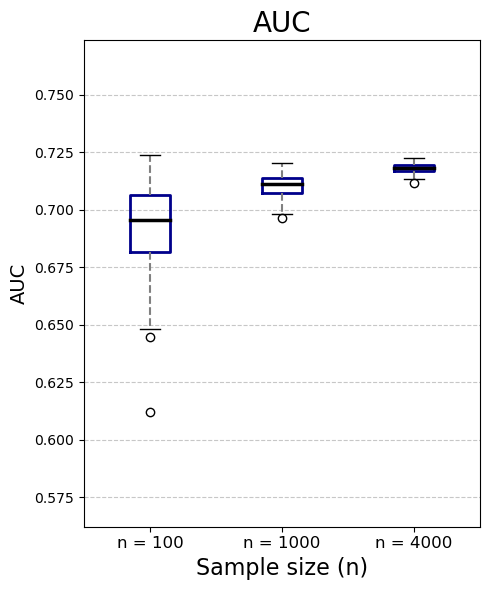

In [5]:
metrics_mitigated_pre_lr = [df_pre_100_lr.auc, df_pre_1000_lr.auc, df_pre_4000_lr.auc]
generate_boxplots(metrics_mitigated_pre_lr, 
                  n_size=n_size,
                  metric = 'AUC', 
                  method = 'correlation remover',
                  file_path = './fig_final/compas_pre_boxplot_auc_lr.png',
                  dataset='COMPAS',
                  clf = 'lr')

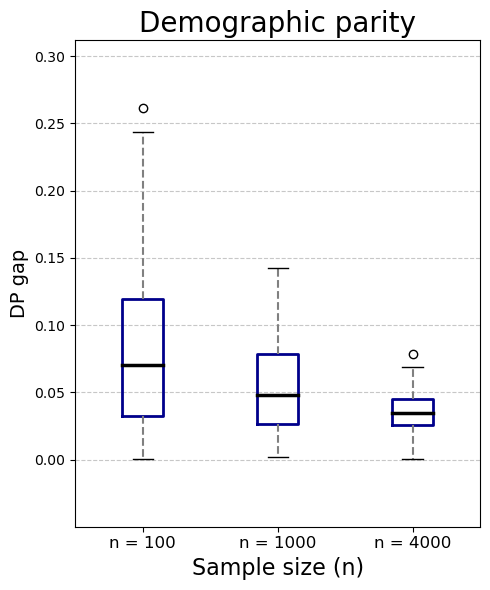

In [6]:
metrics_mitigated_pre_dp_lr = [df_pre_100_lr.dp, df_pre_1000_lr.dp, df_pre_4000_lr.dp]
generate_boxplots(metrics_mitigated_pre_dp_lr, 
                  n_size=n_size,
                  metric = 'Demographic parity',
                  method = 'correlation remover',
                  file_path = './fig_final/compas_pre_boxplot_dp_lr.png',
                  dataset='COMPAS',
                  clf = 'lr')

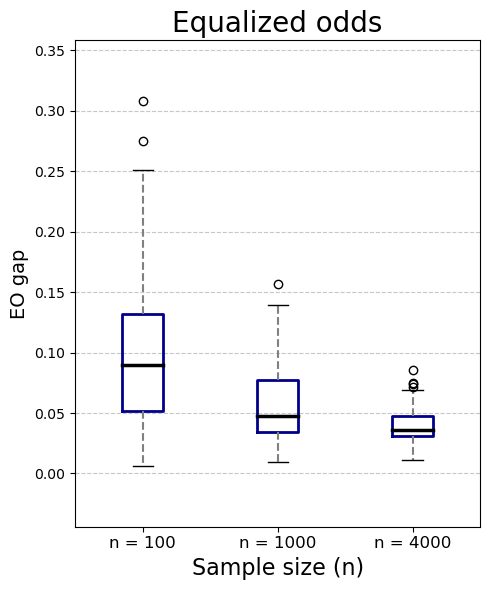

In [7]:
metrics_mitigated_pre_eo_lr = [df_pre_100_lr.eo, df_pre_1000_lr.eo, df_pre_4000_lr.eo]
generate_boxplots(metrics_mitigated_pre_eo_lr, 
                  n_size=n_size,
                  metric = 'Equalized odds',
                  method = 'correlation remover',
                  file_path = './fig_final/compas_pre_boxplot_eo_lr.png',
                  dataset='COMPAS',
                  clf = 'lr')

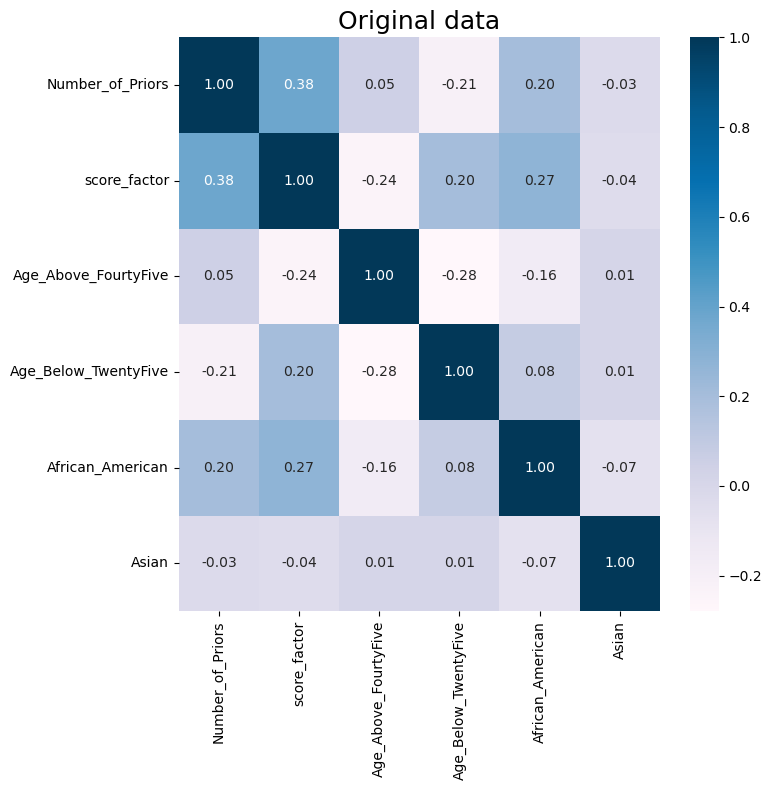

In [3]:
correlation_heatmap(X_train, 'African_American', mode = 0, file_path='./fig_final/compas_original_heatmap.png')

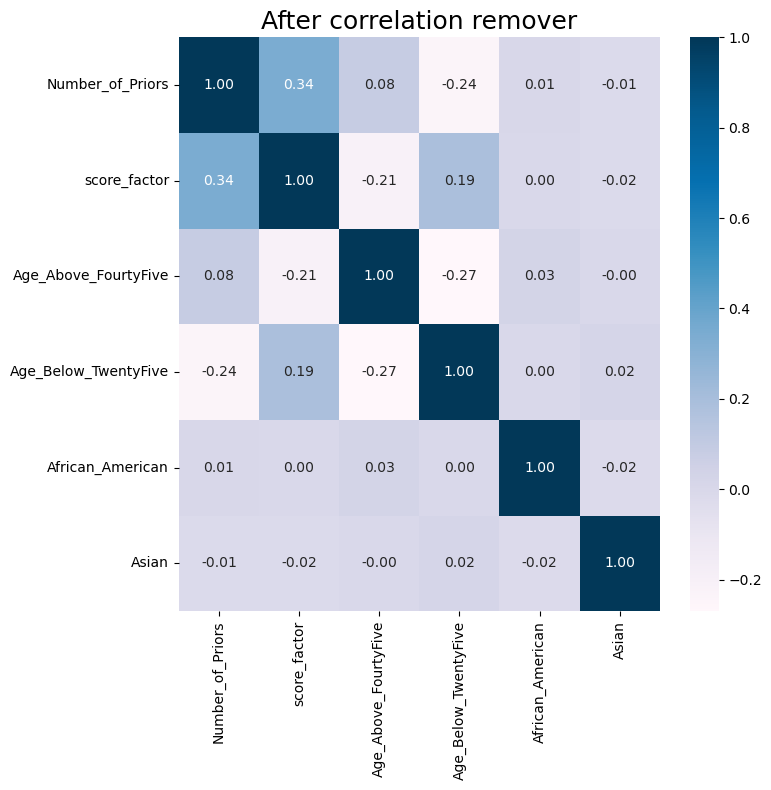

In [4]:
correlation_heatmap(X_train, 'African_American', mode = 1, file_path='./fig_final/compas_correlation_heatmap.png')

## In-processing

In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                       B = 100, n_size = n_size,clf = 'rf', base_path=base_path)

In [10]:
clf = "rf"
df_in_100_dp_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_in_1000_dp_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_in_4000_dp_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_in_100_dp_rf, df_in_1000_dp_rf, df_in_4000_dp_rf)

Confidence intervals for size 1
AUC: [0.55,0.64]
DP: [0.01,0.24]
EO: [0.02,0.31]

Confidence intervals for size 2
AUC: [0.58,0.64]
DP: [0.01,0.15]
EO: [0.02,0.14]

Confidence intervals for size 3
AUC: [0.62,0.66]
DP: [0.00,0.05]
EO: [0.02,0.11]


In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                       B = 100, n_size = n_size, clf = 'rf', base_path = base_path)

In [12]:
clf = "rf"
df_in_100_eo_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_in_1000_eo_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_in_4000_eo_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_in_100_eo_rf, df_in_1000_eo_rf, df_in_4000_eo_rf)

Confidence intervals for size 1
AUC: [0.56,0.65]
DP: [0.00,0.30]
EO: [0.01,0.31]

Confidence intervals for size 2
AUC: [0.59,0.64]
DP: [0.00,0.13]
EO: [0.01,0.12]

Confidence intervals for size 3
AUC: [0.62,0.67]
DP: [0.01,0.09]
EO: [0.01,0.10]


#### Logistic regression

In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                       B = 100, n_size = n_size,clf = 'lr', base_path=base_path)

In [15]:
clf = "lr"
df_in_100_dp_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_in_1000_dp_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_in_4000_dp_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_in_100_dp_lr, df_in_1000_dp_lr, df_in_4000_dp_lr)

Confidence intervals for size 1
AUC: [0.48,0.67]
DP: [0.00,0.23]
EO: [0.01,0.24]

Confidence intervals for size 2
AUC: [0.66,0.70]
DP: [0.00,0.07]
EO: [0.02,0.13]

Confidence intervals for size 3
AUC: [0.67,0.70]
DP: [0.00,0.04]
EO: [0.03,0.10]


In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                       B = 100, n_size = n_size, clf = 'lr', base_path = base_path)

In [16]:
clf = "lr"
df_in_100_eo_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_in_1000_eo_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_in_4000_eo_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_in_100_eo_lr, df_in_1000_eo_lr, df_in_4000_eo_lr)

Confidence intervals for size 1
AUC: [0.63,0.70]
DP: [0.00,0.21]
EO: [0.02,0.21]

Confidence intervals for size 2
AUC: [0.66,0.70]
DP: [0.00,0.07]
EO: [0.01,0.11]

Confidence intervals for size 3
AUC: [0.67,0.71]
DP: [0.00,0.06]
EO: [0.01,0.08]


## Post-processing

In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                              B = 100, n_size = n_size, clf = 'rf', base_path=base_path)

In [9]:
clf = "rf"
df_post_100_dp_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_post_1000_dp_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_post_4000_dp_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_post_100_dp_rf, df_post_1000_dp_rf, df_post_4000_dp_rf)

Confidence intervals for size 1
AUC: [0.51,0.62]
DP: [0.01,0.39]
EO: [0.03,0.43]

Confidence intervals for size 2
AUC: [0.59,0.63]
DP: [0.00,0.13]
EO: [0.03,0.18]

Confidence intervals for size 3
AUC: [0.63,0.66]
DP: [0.00,0.05]
EO: [0.03,0.12]


In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                              B = 100, n_size = n_size, clf = 'rf', base_path=base_path)

In [11]:
clf = 'rf'
df_post_100_eo_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_post_1000_eo_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_post_4000_eo_rf = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_post_100_eo_rf, df_post_1000_eo_rf, df_post_4000_eo_rf)

Confidence intervals for size 1
AUC: [0.59,0.66]
DP: [0.01,0.30]
EO: [0.03,0.37]

Confidence intervals for size 2
AUC: [0.60,0.65]
DP: [0.02,0.17]
EO: [0.05,0.23]

Confidence intervals for size 3
AUC: [0.63,0.67]
DP: [0.05,0.12]
EO: [0.06,0.16]


#### Logistic regression

In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                              B = 100, n_size = n_size, clf = 'lr', base_path=base_path)

In [16]:
clf = 'lr'
df_post_100_dp_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_post_1000_dp_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_post_4000_dp_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_post_100_dp_lr, df_post_1000_dp_lr, df_post_4000_dp_lr)

Confidence intervals for size 1
AUC: [0.60,0.69]
DP: [0.00,0.26]
EO: [0.01,0.26]

Confidence intervals for size 2
AUC: [0.66,0.71]
DP: [0.00,0.07]
EO: [0.01,0.12]

Confidence intervals for size 3
AUC: [0.67,0.71]
DP: [0.00,0.03]
EO: [0.03,0.08]


In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                              B = 100, n_size = n_size, clf = 'lr', base_path=base_path)

In [17]:
clf = 'lr'
df_post_100_eo_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_post_1000_eo_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_post_4000_eo_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_post_100_eo_lr, df_post_1000_eo_lr, df_post_4000_eo_lr)

Confidence intervals for size 1
AUC: [0.60,0.70]
DP: [0.01,0.32]
EO: [0.04,0.33]

Confidence intervals for size 2
AUC: [0.65,0.70]
DP: [0.00,0.07]
EO: [0.01,0.12]

Confidence intervals for size 3
AUC: [0.66,0.70]
DP: [0.00,0.06]
EO: [0.01,0.09]
